# Language Distribution

Using the merged dataset (complete_dataset) containing all of the collected data over the period of 1893-1963 by Mona Allaert, Elisabeth Jansen and me to look at the language distribution in productions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("Set2")

df = pd.read_csv('complete_dataset.csv', encoding='utf-8', index_col=False)
# Strip leading and trailing whitespaces
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue
# Removing redundant columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.sample(10)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Image,Collection,Production,Date,Occasion,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Season,Directors,Title Language,Leaflet Language
4092,1931-1932_00333-20220210_115747.jpg,1931-1932,Tannhauser,1932-04-17,Eereavond,False,609620,Tannhauser,DUI,Richard Wagner,1845,Tannhäuser,romantische oper,1931-1932,Fé Derickx & Bernard Tokkie,Unk,NaN
10702,Scan 2024-04-29 1742-283.jpeg,1962-1963,Paljas,NaN,NaN,True,816412,Paljas,ITA,Ruggiero Leoncavallo,NaN,Pagliacci,verisme,1962-1963,Renaat Verbruggen,Unk,ned
7318,Scan 2024-02-16 1040-22.jpeg,1948-1949,Carmen,NaN,NaN,False,752545,Carmen,FR,Georges Bizet,NaN,Carmen,opéra comique,1948-1949,Karel Bogaers,Unk,ned
1907,1918-1919_00016-20220207_093957.jpg,1918-1919,De Bruid der Zee,1918-11-14,NaN,False,697421,De Bruid der Zee,NL,Jan Blockx,1901,De Bruid der Zee,romantische opera,1918-1919,Henry Fontaine,NL,NaN
6681,0338_1945-1946_00338-20230310_131411.jpg,1945/1946,De Tooverlantaarn,1946-04-07,NaN,True,970523,De Tooverlantaarn,NL,Karel Albert,1946,De Tooverlantaarn,ballet,1945-1946,August L. Baeyens,NL,Dutch
3896,1930-1931_00755-20220210_101647.jpg,1930-1931,Laagland,1931-05-02,Tot sluiting van het tooneeljaar,False,867221,Laagland,DUI,Albert D'Eugen,1903,Tiefland,melodramatische oper,1930-1931,Fé Derickx & Bernard Tokkie,NL,NaN
5867,0069_1942-1943_00069-20230306_122838.jpg,1942-1943,Dansenreeks,1942-10-17,NaN,True,464245,Dansenreeks,?,?,?,Dansenreeks,ballet,1942-1943,Joris Diels,NL,Dutch
6518,0212_1944-1945_00212-20230310_112232.jpg,1944/1945,Herodias,1945-07-29,NaN,False,928141,Herodias,FR,Jules Massenet,1882,Hérodiade,romantische opera,1944-1945,August L. Baeyens,Unk,Dutch
3993,1931-1932_00147-20220210_113756.jpg,1931-1932,Frederika,1931-12-13,NaN,False,583666,Frederika,DUI,Franz Lehár,1928,Friederika,leichte oper,1931-1932,Fé Derickx & Bernard Tokkie,Unk,NaN
3432,1928-1929_00249-20220208_154221.jpg,1928-1929,Faust,1929-02-24,NaN,False,595908,Faust,FR,Charles Gounod,1859,Faust,grand opera,1928-1929,Fé Derickx & Bernard Tokkie,Unk,NaN


## Language Distribution 1893-1963

In [2]:
# Preprocessing

counts = df.groupby('Season')['Original Language'].value_counts().unstack().fillna(0)
# grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season)

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

# Adding zero counts for each language during the period when the Opera was closed
counts.loc['1914-1915'] = [0, 0, 0, 0]
counts.loc['1915-1916'] = [0, 0, 0, 0]
counts.loc['1916-1917'] = [0, 0, 0, 0]
counts.loc['1917-1918'] = [0, 0, 0, 0]

counts = counts.sort_index()
x = list(counts.index.unique())

closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
closed_data = {col: 0 for col in counts.columns}
closed_df = pd.DataFrame([closed_data], index=closed_seasons)
counts = pd.concat([counts, closed_df])

# Sorting the index so that the seasons occur chronologically on the plot
counts = counts.sort_index()
x = list(counts.index.unique())

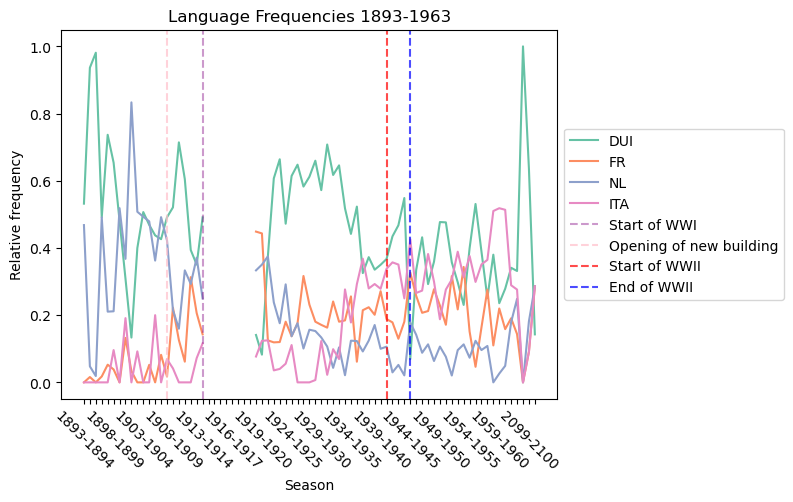

In [3]:
# Relative frequencies 1893-1963

total_counts = counts.sum(axis=1) # Sum across rows to get total of performances per season

# Relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('Language Frequencies 1893-1963')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')
plt.axvline(x=counts.index.get_loc('1944-1945'), color='blue', alpha=0.7, linestyle='--', label='End of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]  # Show every 5 years
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

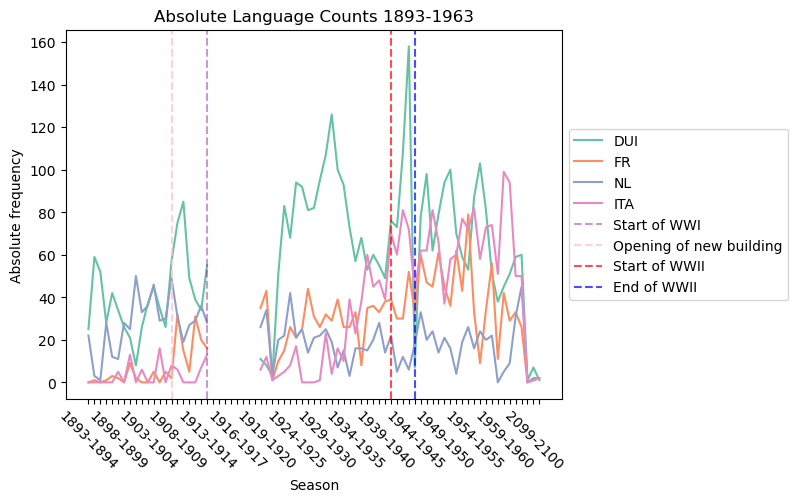

In [4]:
# Absolute frequencies 1893-1963

# Convert 0 to NaN counts for each language during the period when the Opera was closed
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
counts.loc[closed_seasons, :] = np.nan

# Sort the index so that the seasons occur chronologically on the plot
counts = counts.sort_index()
x = list(counts.index.unique())

counts.plot(kind='line')

plt.title('Absolute Language Counts 1893-1963')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')
plt.axvline(x=counts.index.get_loc('1944-1945'), color='blue', alpha=0.7, linestyle='--', label='End of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Language Distribution 1946-1963

In [5]:
df_1946_1963 = df[(df['Collection'] >= '1946-1947') & (df['Collection'] <= '1962-1963')]
df_1946_1963.shape

(4042, 17)

In [6]:
counts = df_1946_1963.groupby('Collection')['Original Language'].value_counts().unstack().fillna(0)
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

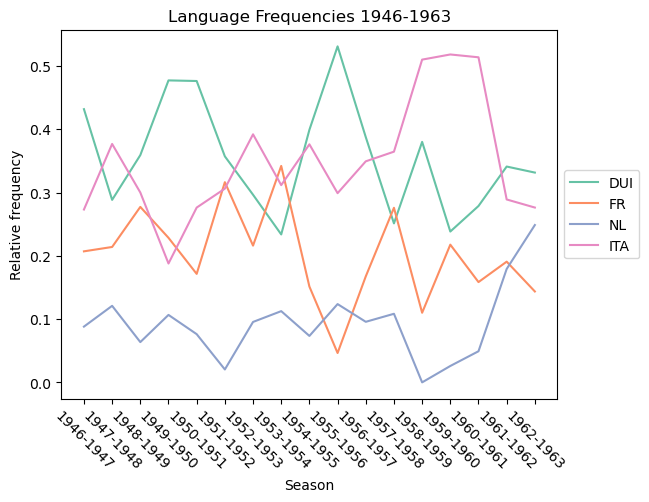

In [7]:
# Relative frequencies 1946-1963

total_counts = counts.sum(axis=1)

rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('Language Frequencies 1946-1963')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

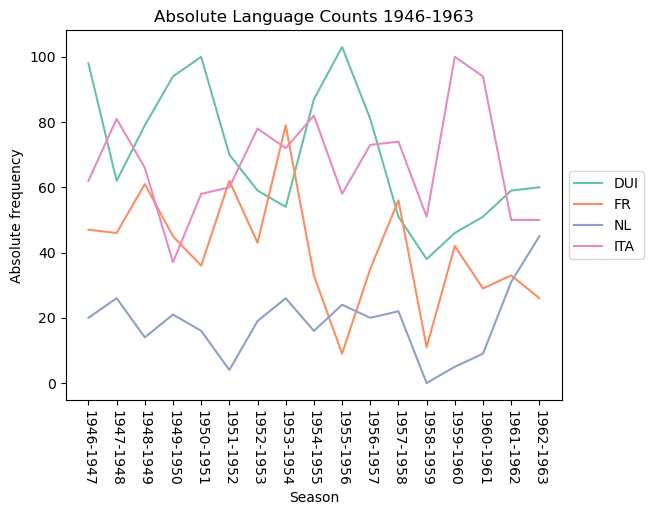

In [8]:
# Absolute frequencies 1946-1963

counts.plot(kind='line')

plt.title('Absolute Language Counts 1946-1963')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-90)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Overview of Language Distribution

In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [10]:
# Get unique seasons and order them
unique_seasons = df['Collection'].unique()
ordered_seasons = sorted(unique_seasons)

In [11]:
# How many performances were classified as Season 2099-2100
performances_2099_2100 = df[df['Collection'] == '2099-2100']['Performance_ID'].nunique()
performances_2099_2100

0

In [12]:
# Italian

# Store results
performance_dfITA = pd.DataFrame(columns=['Collection', 'Performances_Italian', 'Percentage_Italian'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df[df['Collection'] == season]['Performance_ID'].nunique()
    performances_italian = df[(df['Collection'] == season) & (df['Original Language'] == 'ITA')]['Performance_ID'].nunique()
    percentage_italian = (performances_italian / total_performances) * 100
    
    # Add to the DataFrame
    performance_dfITA = performance_dfITA.append({'Collection': season, 'Performances_Italian': performances_italian, 'Percentage_Italian': percentage_italian}, ignore_index=True)

# Display the resulting DataFrame
performance_dfITA

,Collection,Performances_Italian,Percentage_Italian
0,1893-1897,0,0.000000
1,1897-1900,5,2.577320
2,1900-1901,13,14.942529
3,1901-1902,0,0.000000
4,1902-1903,6,8.219178
5,1903-1904,0,0.000000
6,1904-1905,0,0.000000
7,1905-1906,16,19.512195
8,1906-1907,0,0.000000
9,1907-1908,8,5.594406


In [13]:
# French
# Store results
performance_df = pd.DataFrame(columns=['Collection', 'Performances_French', 'Percentage_French'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df[df['Collection'] == season]['Performance_ID'].nunique()
    performances_French = df[(df['Collection'] == season) & (df['Original Language'] == 'FR')]['Performance_ID'].nunique()
    percentage_French = (performances_French / total_performances) * 100
    
    # Append to the DataFrame
    performance_df = performance_df.append({'Collection': season, 'Performances_French': performances_French, 'Percentage_French': percentage_French}, ignore_index=True)

# Display the resulting DataFrame
performance_df

,Collection,Performances_French,Percentage_French
0,1893-1897,3,1.214575
1,1897-1900,5,2.577320
2,1900-1901,9,10.344828
3,1901-1902,2,2.985075
4,1902-1903,0,0.000000
5,1903-1904,0,0.000000
6,1904-1905,5,4.629630
7,1905-1906,0,0.000000
8,1906-1907,5,6.493506
9,1907-1908,2,1.398601


In [14]:
# Dutch

# Store results
performance_df = pd.DataFrame(columns=['Collection', 'Performances_Dutch', 'Percentage_Dutch'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df[df['Collection'] == season]['Performance_ID'].nunique()
    performances_Dutch = df[(df['Collection'] == season) & (df['Original Language'] == 'NL')]['Performance_ID'].nunique()
    percentage_Dutch = (performances_Dutch / total_performances) * 100
    
    # Append to the DataFrame
    performance_df = performance_df.append({'Collection': season, 'Performances_Dutch': performances_Dutch, 'Percentage_Dutch': percentage_Dutch}, ignore_index=True)

# Display the resulting DataFrame
performance_df

,Collection,Performances_Dutch,Percentage_Dutch
0,1893-1897,54,21.862348
1,1897-1900,51,26.288660
2,1900-1901,25,28.735632
3,1901-1902,50,74.626866
4,1902-1903,32,43.835616
5,1903-1904,37,47.435897
6,1904-1905,50,46.296296
7,1905-1906,25,30.487805
8,1906-1907,30,38.961039
9,1907-1908,52,36.363636


In [15]:
# German

# Store results
performance_df = pd.DataFrame(columns=['Collection', 'Performances_German', 'Percentage_German'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df[df['Collection'] == season]['Performance_ID'].nunique()
    performances_German = df[(df['Collection'] == season) & (df['Original Language'] == 'DUI')]['Performance_ID'].nunique()
    percentage_German = (performances_German / total_performances) * 100
    
    # Append to the DataFrame
    performance_df = performance_df.append({'Collection': season, 'Performances_German': performances_German, 'Percentage_German': percentage_German}, ignore_index=True)

# Display the resulting DataFrame
performance_df

,Collection,Performances_German,Percentage_German
0,1893-1897,164,66.396761
1,1897-1900,102,52.577320
2,1900-1901,21,24.137931
3,1901-1902,7,10.447761
4,1902-1903,27,36.986301
5,1903-1904,36,46.153846
6,1904-1905,46,42.592593
7,1905-1906,35,42.682927
8,1906-1907,26,33.766234
9,1907-1908,61,42.657343
